# ***Loan Status***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn import svm
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer

## **Train Dataset**

In [2]:
df_train = pd.read_csv('loan-train.csv', index_col=0)
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## **Exploratory Data Analysis**

In [3]:
df_train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
df_train.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## **Data Encoding**

In [5]:
le = LabelEncoder()
for col in df_train.select_dtypes(include=['object']).columns:
    df_train[col] = le.fit_transform(df_train[col])
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


## **Data Imputation**

In [6]:
imputer = KNNImputer(n_neighbors=3)
df_train_data = imputer.fit_transform(df_train)
df_train_new = pd.DataFrame(df_train_data, columns=df_train.columns)
df_train_new.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849.0,0.0,138.0,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,2.0,1.0


Text(0.5, 1.0, 'Gender-Self_Employed Plot')

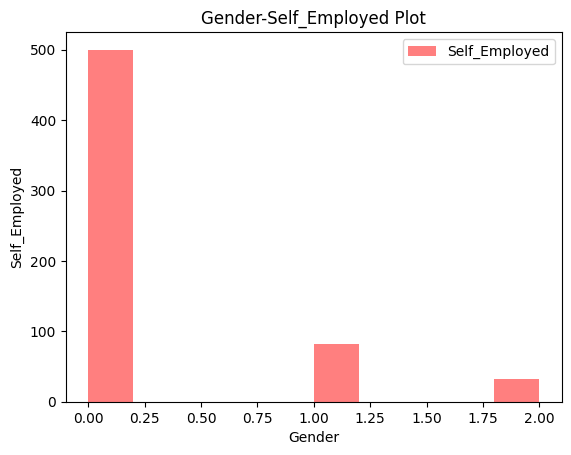

In [39]:
x_col, y_col = "Gender", "Self_Employed"
df_train_new.plot(kind='hist',x=x_col,y=y_col,alpha = 0.5, color= 'red')
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title(f'{x_col}-{y_col} Plot')

In [8]:
X = df_train_new.drop(columns='Loan_Status')
y = df_train_new['Loan_Status']

## **Data Resampling**

In [9]:
y.value_counts()

Loan_Status
1.0    422
0.0    192
Name: count, dtype: int64

In [10]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [11]:
y_resampled.value_counts()

Loan_Status
1.0    422
0.0    422
Name: count, dtype: int64

## **Data Spliting**

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

## **Model**

In [14]:
ml = svm.SVC()

param_grid = {
    'C': [1, 10, 100, 1000, 10000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

grid = GridSearchCV(ml, param_grid, refit=True, verbose=1, cv=15)

grid_search = grid.fit(X_train, y_train)

Fitting 15 folds for each of 25 candidates, totalling 375 fits


In [15]:
print(grid_search.best_params_)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}


In [16]:
accuracy = grid_search.best_score_ * 100
print("Accuracy for our training dataset with tuning: {:.2f}".format(accuracy))

Accuracy for our training dataset with tuning: 79.11


In [17]:
y_val_hat = grid.predict(X_val)
test_accuracy = accuracy_score(y_val, y_val_hat)*100
test_accuracy
print("Accuracy for our validating dataset with tuning: {:.2f}".format(test_accuracy))

Accuracy for our validating dataset with tuning: 78.11


In [18]:
conf_matrix = confusion_matrix(y_val, y_val_hat)
cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=[True, False])

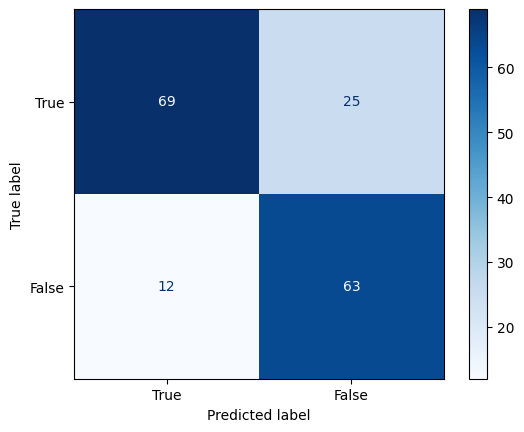

In [19]:
cm_display.plot(cmap='Blues')
plt.show()

In [20]:
accuracy = accuracy_score(y_val, y_val_hat)
print(f'SVC Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', confusion_matrix(y_val, y_val_hat))
print('Classification Report:\n', classification_report(y_val, y_val_hat))

SVC Accuracy: 0.78
Confusion Matrix:
 [[69 25]
 [12 63]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.73      0.79        94
         1.0       0.72      0.84      0.77        75

    accuracy                           0.78       169
   macro avg       0.78      0.79      0.78       169
weighted avg       0.79      0.78      0.78       169



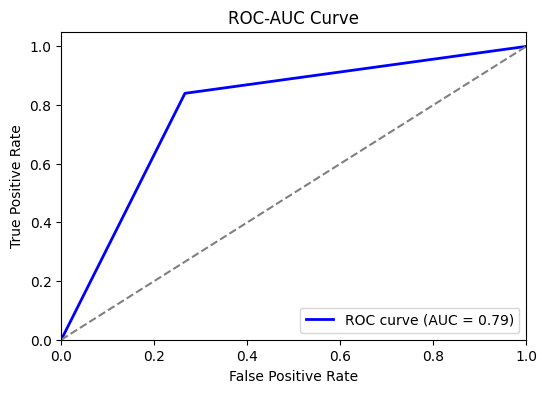

In [21]:
fpr, tpr, _ = roc_curve(y_val, y_val_hat)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()

In [22]:
roc_auc = roc_auc_score(y_val, y_val_hat)
print("ROC AUC Score", roc_auc)

ROC AUC Score 0.7870212765957446


## **Test Dataset**

In [23]:
df_test = pd.read_csv('loan-test.csv', index_col=0)
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [24]:
df_test.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [25]:
le = LabelEncoder()
for col in df_test.select_dtypes(include=['object']).columns:
    df_test[col] = le.fit_transform(df_test[col])
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
LP001035,1,1,2,0,0,2340,2546,100.0,360.0,NaN,2
LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


In [26]:
imputer = KNNImputer(n_neighbors=3)
df_test_data = imputer.fit_transform(df_test)
df_test_new = pd.DataFrame(df_test_data, columns=df_test.columns)
df_test_new.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1.0,0.0,0.0,0.0,5720.0,0.0,110.0,360.0,1.000000,2.0
1,1.0,1.0,1.0,0.0,0.0,3076.0,1500.0,126.0,360.0,1.000000,2.0
2,1.0,1.0,2.0,0.0,0.0,5000.0,1800.0,208.0,360.0,1.000000,2.0
3,1.0,1.0,2.0,0.0,0.0,2340.0,2546.0,100.0,360.0,0.666667,2.0
4,1.0,0.0,0.0,1.0,0.0,3276.0,0.0,78.0,360.0,1.000000,2.0


In [27]:
y_pred = grid.predict(df_test_new)
df_test_new['Loan Status'] = y_pred
df_test_new['Loan Status'].value_counts()

c:\Users\pandi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Loan Status
1.0    367
Name: count, dtype: int64